In [455]:
import numpy as np
import yfinance as yf
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

import matplotlib.animation as animation

In [456]:
START = "2021-01-01"
END = "2025-01-01"
TICKER = "^GSPC"
TITLE = TICKER + " - " +(datetime.now()).strftime("%Y-%m-%d - %H:%M:%S")

In [457]:
data = pd.read_csv("data.csv",index_col=0)

# data = yf.download(TICKER,start=START, end=END,multi_level_index=False)

data["log_return"] = np.log(data["Close"] / data["Close"].shift(1))
data["high_log_return"] = np.log(data["High"] / data["High"].shift(1))
data["low_log_return"] = np.log(data["Low"] / data["Low"].shift(1))
data["open_log_return"] = np.log(data["Open"] / data["Open"].shift(1))

data["cum_log_return"] = data["log_return"].cumsum()
data["cum_high_log_return"] = data["high_log_return"].cumsum()
data["cum_low_log_return"] = data["low_log_return"].cumsum()
data["cum_open_log_return"] = data["open_log_return"].cumsum()

data.dropna(inplace=True)
data.drop(columns=["Volume"],inplace=True)

data.index = pd.to_datetime(data.index)

<Axes: xlabel='Date'>

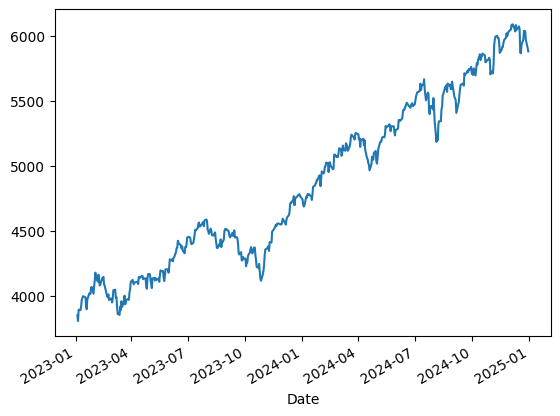

In [463]:
data["Adj Close"].plot()

In [459]:
data = data.asfreq("B")
data.dropna(inplace=True)

In [479]:
def ichimoku(data_):
    index2 = pd.date_range(data.index[-1],periods=26, freq="B")
    index2 = data_.index.union(index2)
    print(len(data.index))
    data_ = data_.reindex(index2)
    data_["tenkan"] = ((data_["cum_high_log_return"].rolling(9).max()) + (data_["cum_low_log_return"].rolling(9).min())) / 2
    data_["kijin"] = ((data_["cum_high_log_return"].rolling(26).max()) + (data_["cum_low_log_return"].rolling(26).min())) / 2
    data_["chikou"] = data_["cum_log_return"].shift(-26)
    data_["span_a"] = (((data_["tenkan"] + data_["kijin"])) / 2).shift(26)
    data_["span_b"] = (((data_["cum_high_log_return"].rolling(52).max()) + (data_["cum_low_log_return"].rolling(52).min())) / 2).shift(26)
    return data_

In [484]:
data_ichi = ichimoku(data)[-75:]
data_ichi *= 100

501


C:\Users\olive\AppData\Local\Temp\ipykernel_19464\418736264.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


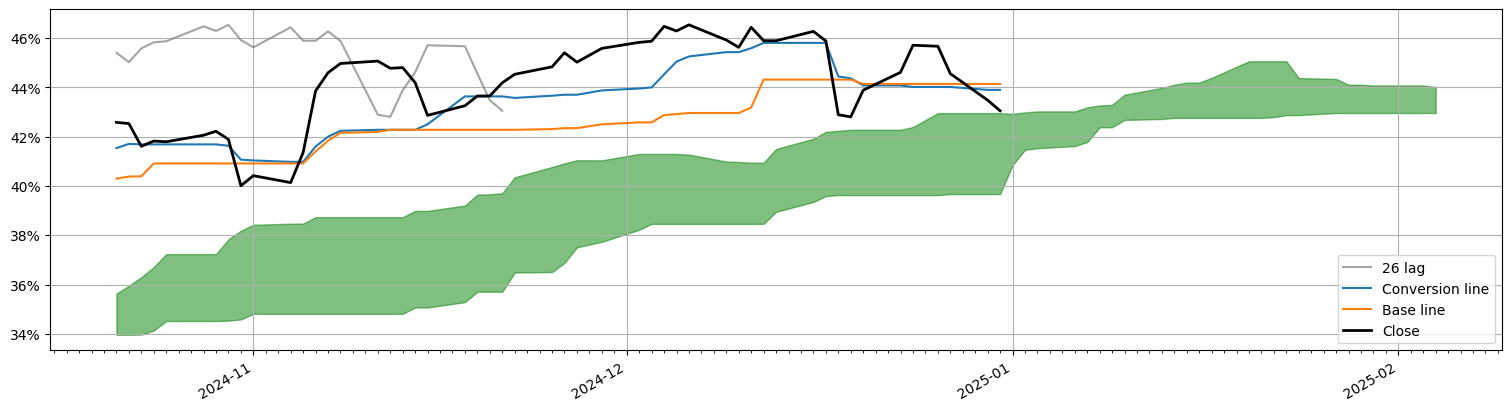

In [485]:
fig, ax1 = plt.subplots(figsize=(15,4),layout='constrained')

lagged, = ax1.plot(data_ichi["chikou"], label="26 lag", color="tab:grey",alpha=0.7)
conv, = ax1.plot(data_ichi["tenkan"], label="Conversion line", color="tab:blue")
base, = ax1.plot(data_ichi["kijin"], label="Base line", color="tab:orange")
# fast, = ax1.plot(data_ichi["span_a"], label="Span A",color="tab:green")
# slow, = ax1.plot(data_ichi["span_b"], label="Span B",color="tab:red")
price, = ax1.plot(data_ichi["cum_log_return"], label="Close",lw=2,color="black")

plt.fill_between(data_ichi.index,data_ichi["span_a"],data_ichi["span_b"],data_ichi["span_a"] > data_ichi["span_b"],color="green",alpha=0.5)
plt.fill_between(data_ichi.index,data_ichi["span_b"],data_ichi["span_a"],data_ichi["span_a"] < data_ichi["span_b"],color="red",alpha=0.5)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
# ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))
# ax1.xaxis.set_major_locator(mdates.YearLocator())

# ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_minor_locator(mdates.DayLocator())
fig.autofmt_xdate()

ax1.grid(True)
# ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))

ax1.legend(loc=4)

fig.show()

In [ ]:
from dataclasses import dataclass,field
from random import randint

@dataclass
class Trade:
    trade_id: int
    date: datetime
    long: bool
    entry_price: float
    exit_price: float = None
    exit_date: datetime = None
    is_open: bool = True

    def close_trade(self, date, row):
        self.exit_price = row["Close"]
        self.exit_date = date
        self.is_open = False

class Strategy:
    def __init__(self):
        pass
    
    def buy(self, index, data):
        return Trade(randint(0,15999),index,True,data["Close"])

    def sell(self, index, data):
        return Trade(randint(0,15999),index,False,data["Close"])

    def logic(self, index, data):
        # logic
        if data[""]


class Backtest:
    def __init__(self, strategy, data):
        self.account = 10_000 # Any number
        self.positions = [] # List of open trades
        self.history = [] # List of closed trades
        self.strategy = strategy
        self.data = data

    def backtest(self):
        
        for index, row in self.data.iterrows():
            
            trade = self.strategy.trade(index, row)

            if not trade is None:
                # If there is a trade
                if trade in self.positions:
                    # If the trade already exists it needs to be closed
                    self.positions.remove(trade)
                    # trade.exit_price = row["Close"]
                    self.history.append(trade.close_trade(index,row))
                else:
                    # This is a new trade and needs to be added
                    self.positions.append(trade)

                    if trade.long:
                        # credit account
                        self.account -= trade.entry_price
                    else:
                        self.account += trade.entry_price

            



        